In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


##Goal: analyze NYC 911 response time trend + prepare data for modeling

In [3]:

#url = "https://data.cityofnewyork.us/resource/76xm-jjuj.csv?$limit=60000"
#main_df1 = pd.read_csv(url)

#main_df1.head()


In [4]:
from statsmodels.graphics.tsaplots import plot_acf

In [5]:
#main_df1.isna().sum()

In [6]:
#main_df1.columns

In [7]:
#main_df1['dispatch_response_seconds_qy']

In [8]:
#import pickle

#with open("nyc_911_calls.pkl", "wb") as f:
    #pickle.dump(main_df1, f)

In [9]:

#with open("nyc_911_calls.pkl", "rb") as f:
 #   df = pickle.load(f)

#df.to_csv("nyc_911_calls.csv", index=False)

In [10]:
main_df = pd.read_csv("nyc_911_calls.csv")

In [11]:
main_df

,cad_incident_id,incident_datetime,initial_call_type,initial_severity_level_code,final_call_type,final_severity_level_code,first_assignment_datetime,valid_dispatch_rspns_time_indc,dispatch_response_seconds_qy,first_activation_datetime,...,zipcode,policeprecinct,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator
0,230010001,2023-01-01T00:00:02.000,UNKNOW,4,UNKNOW,4,2023-01-01T00:23:32.000,Y,1410,2023-01-01T00:23:47.000,...,10128.0,19.0,4.0,108.0,2.0,12.0,Y,N,N,N
1,230010002,2023-01-01T00:00:16.000,RESPFC,4,RESPFC,4,2023-01-01T00:01:22.000,Y,66,2023-01-01T01:42:19.000,...,11221.0,79.0,36.0,303.0,16.0,8.0,N,N,N,N
2,230010003,2023-01-01T00:00:30.000,DIFFFC,2,DIFFFC,2,2023-01-01T00:02:24.000,Y,114,2023-01-01T00:02:33.000,...,10463.0,52.0,14.0,207.0,10.0,13.0,N,N,N,N
3,230010004,2023-01-01T00:01:35.000,INJURY,5,INJURY,5,2023-01-01T01:03:40.000,Y,3725,2023-01-01T01:03:40.000,...,10018.0,14.0,3.0,104.0,2.0,10.0,N,N,N,N
4,230010007,2023-01-01T00:01:55.000,DRUG,4,DRUG,4,2023-01-01T00:23:42.000,Y,1307,2023-01-01T00:23:55.000,...,10034.0,34.0,10.0,112.0,6.0,13.0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,230143182,2023-01-14T18:13:18.000,UNKNOW,4,UNKNOW,4,2023-01-14T18:13:36.000,Y,18,2023-01-14T18:14:10.000,...,11208.0,75.0,42.0,305.0,19.0,8.0,N,N,N,N
59996,230143183,2023-01-14T18:13:31.000,EDP,7,EDP,7,2023-01-14T18:13:52.000,Y,21,2023-01-14T18:14:00.000,...,10007.0,5.0,1.0,101.0,2.0,7.0,N,N,N,N
59997,230143184,2023-01-14T18:13:54.000,UNKNOW,4,UNKNOW,4,2023-01-14T18:15:12.000,Y,78,2023-01-14T18:18:03.000,...,11212.0,73.0,41.0,316.0,23.0,9.0,N,N,N,N
59998,230143185,2023-01-14T18:13:59.000,SICK,6,SICK,6,2023-01-14T18:14:12.000,Y,13,2023-01-14T18:14:19.000,...,10304.0,120.0,49.0,501.0,31.0,11.0,N,N,N,N


In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cad_incident_id                 60000 non-null  int64  
 1   incident_datetime               60000 non-null  object 
 2   initial_call_type               60000 non-null  object 
 3   initial_severity_level_code     60000 non-null  int64  
 4   final_call_type                 60000 non-null  object 
 5   final_severity_level_code       60000 non-null  int64  
 6   first_assignment_datetime       59223 non-null  object 
 7   valid_dispatch_rspns_time_indc  60000 non-null  object 
 8   dispatch_response_seconds_qy    60000 non-null  int64  
 9   first_activation_datetime       59126 non-null  object 
 10  first_on_scene_datetime         57362 non-null  object 
 11  valid_incident_rspns_time_indc  60000 non-null  object 
 12  incident_response_seconds_qy    

In [13]:
main_df['cad_incident_id']

0        230010001
1        230010002
2        230010003
3        230010004
4        230010007
           ...    
59995    230143182
59996    230143183
59997    230143184
59998    230143185
59999    230143187
Name: cad_incident_id, Length: 60000, dtype: int64

In [14]:
main_df['first_assignment_datetime']

0        2023-01-01T00:23:32.000
1        2023-01-01T00:01:22.000
2        2023-01-01T00:02:24.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:42.000
                  ...           
59995    2023-01-14T18:13:36.000
59996    2023-01-14T18:13:52.000
59997    2023-01-14T18:15:12.000
59998    2023-01-14T18:14:12.000
59999    2023-01-14T18:14:46.000
Name: first_assignment_datetime, Length: 60000, dtype: object

In [15]:
main_df['first_activation_datetime']

0        2023-01-01T00:23:47.000
1        2023-01-01T01:42:19.000
2        2023-01-01T00:02:33.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:55.000
                  ...           
59995    2023-01-14T18:14:10.000
59996    2023-01-14T18:14:00.000
59997    2023-01-14T18:18:03.000
59998    2023-01-14T18:14:19.000
59999    2023-01-14T18:15:34.000
Name: first_activation_datetime, Length: 60000, dtype: object

In [16]:
main_df['dispatch_response_seconds_qy']

0        1410
1          66
2         114
3        3725
4        1307
         ... 
59995      18
59996      21
59997      78
59998      13
59999      11
Name: dispatch_response_seconds_qy, Length: 60000, dtype: int64

In [17]:
main_df['first_assignment_datetime']

0        2023-01-01T00:23:32.000
1        2023-01-01T00:01:22.000
2        2023-01-01T00:02:24.000
3        2023-01-01T01:03:40.000
4        2023-01-01T00:23:42.000
                  ...           
59995    2023-01-14T18:13:36.000
59996    2023-01-14T18:13:52.000
59997    2023-01-14T18:15:12.000
59998    2023-01-14T18:14:12.000
59999    2023-01-14T18:14:46.000
Name: first_assignment_datetime, Length: 60000, dtype: object

In [18]:
main_df['incident_datetime']

0        2023-01-01T00:00:02.000
1        2023-01-01T00:00:16.000
2        2023-01-01T00:00:30.000
3        2023-01-01T00:01:35.000
4        2023-01-01T00:01:55.000
                  ...           
59995    2023-01-14T18:13:18.000
59996    2023-01-14T18:13:31.000
59997    2023-01-14T18:13:54.000
59998    2023-01-14T18:13:59.000
59999    2023-01-14T18:14:35.000
Name: incident_datetime, Length: 60000, dtype: object

In [19]:
main_df.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator'],
      dtype='object')

In [20]:
main_df['valid_dispatch_rspns_time_indc'].value_counts()

valid_dispatch_rspns_time_indc
Y    59218
N      782
Name: count, dtype: int64

In [21]:
main_df.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator'],
      dtype='object')

Dropped missing values in a separate dataframe to analyze autocorrelation using plot_acf, while preserving the original main_df.

In [22]:
try_df = main_df[['incident_datetime','incident_response_seconds_qy','incident_travel_tm_seconds_qy','dispatch_response_seconds_qy',
'special_event_indicator','held_indicator']].copy()


In [23]:
try_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   incident_datetime              60000 non-null  object 
 1   incident_response_seconds_qy   57358 non-null  float64
 2   incident_travel_tm_seconds_qy  57362 non-null  float64
 3   dispatch_response_seconds_qy   60000 non-null  int64  
 4   special_event_indicator        60000 non-null  object 
 5   held_indicator                 60000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.7+ MB


In [24]:
try_df =try_df.dropna()

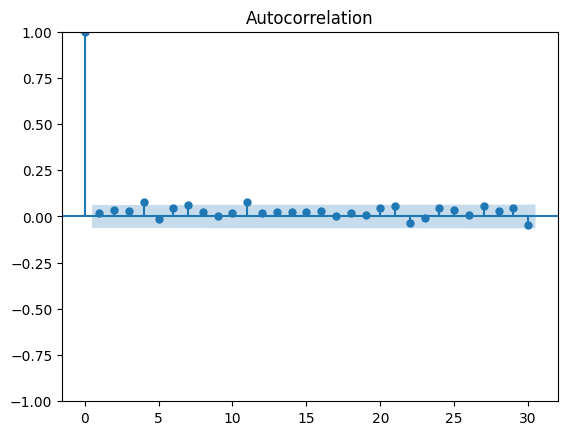

<Figure size 1400x300 with 0 Axes>

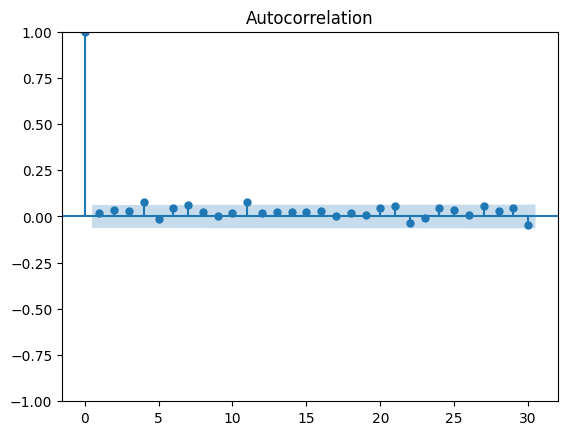

In [25]:
plt.figure(figsize=(14,3))
plot_acf(try_df['incident_response_seconds_qy'][:1000])


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(try_df['incident_response_seconds_qy'],period=7)

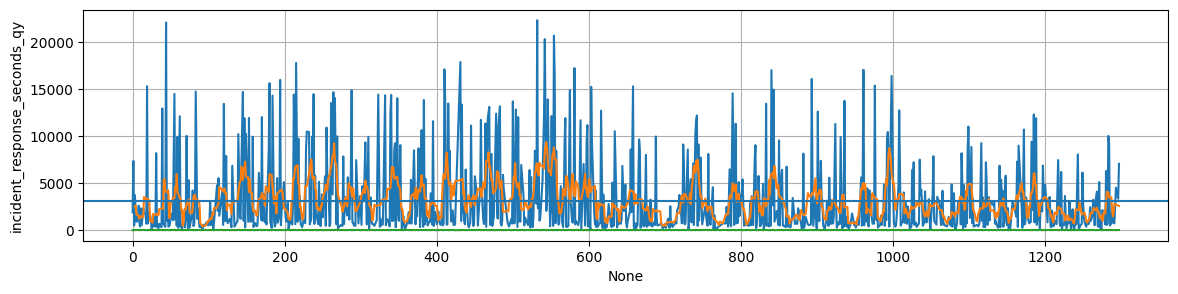

In [27]:
plt.figure(figsize=(14,3))
sns.lineplot(x=try_df.index[:1000],y=try_df['incident_response_seconds_qy'][:1000])
sns.lineplot(decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(try_df['incident_response_seconds_qy'][:1000].mean())
plt.grid()

Most lags stay within the confidence band, suggesting weak autocorrelation (limited day-to-day dependence)

## i am looking for a create basic lineaar regression using a time
## see that each year the reponse time
## in this analyst i am using  Time index: incident_datetime
## Target:incident_response_seconds_qy

In [28]:
time_df = main_df[["incident_datetime","incident_response_seconds_qy"]].copy()

In [29]:
time_df.head()

,incident_datetime,incident_response_seconds_qy
0,2023-01-01T00:00:02.000,1887.0
1,2023-01-01T00:00:16.000,7365.0
2,2023-01-01T00:00:30.000,479.0
3,2023-01-01T00:01:35.000,3725.0
4,2023-01-01T00:01:55.000,2108.0


In [30]:
time_df['incident_datetime'] = pd.to_datetime(time_df['incident_datetime'])


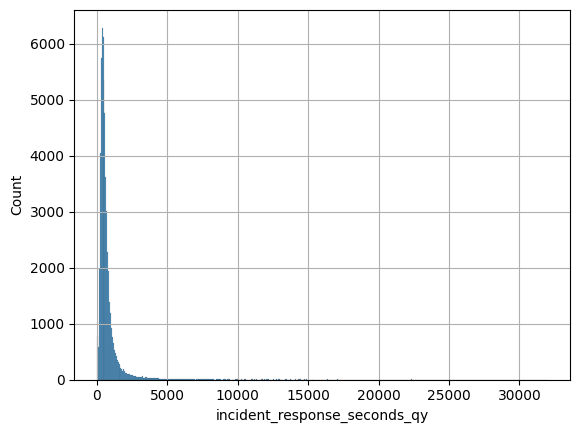

In [31]:
sns.histplot(time_df['incident_response_seconds_qy'])
plt.grid()

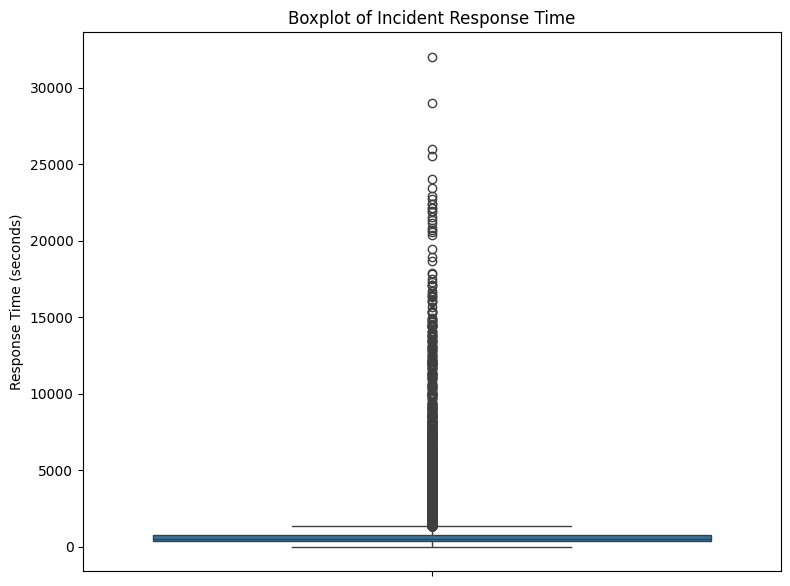

In [32]:
plt.figure(figsize=(9,7))
sns.boxplot(y=time_df['incident_response_seconds_qy'])
plt.title("Boxplot of Incident Response Time")
plt.ylabel("Response Time (seconds)")
plt.show()

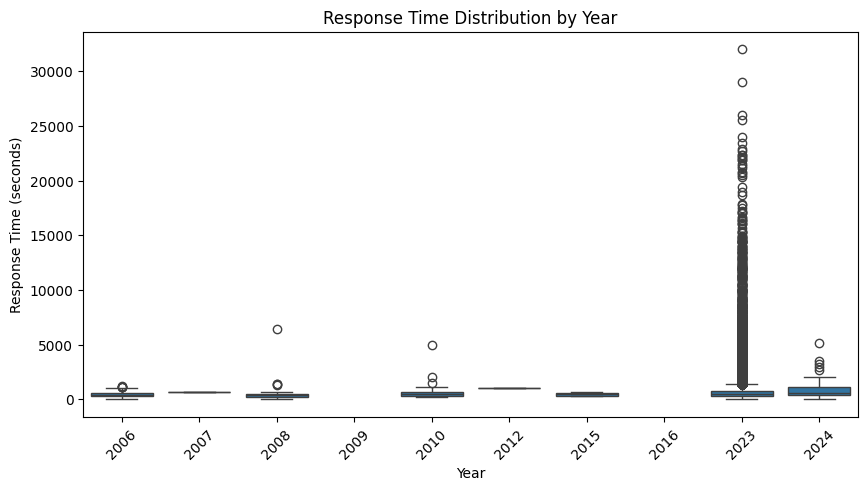

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x=time_df['incident_datetime'].dt.year,y=time_df['incident_response_seconds_qy'])
plt.xticks(rotation=45)
plt.title("Response Time Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Response Time (seconds)")
plt.show()

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

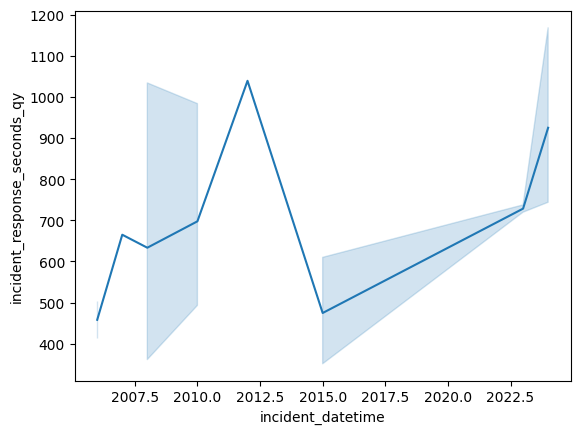

In [34]:
sns.lineplot(
    x=time_df['incident_datetime'].dt.year,
    y=time_df['incident_response_seconds_qy'],
    estimator='mean'
)

The annual average response time exhibits a fluctuating pattern, with a peak around 2012 followed by a sharp decline. After 2015, a gradual upward trend is observed, reaching one of its highest levels in 2023.

In [35]:
time_df.isna().sum()

incident_datetime                  0
incident_response_seconds_qy    2642
dtype: int64

In [36]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   incident_datetime             60000 non-null  datetime64[ns]
 1   incident_response_seconds_qy  57358 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 937.6 KB


In [37]:
time_df['incident_datetime']= pd.to_datetime(main_df['incident_datetime'])


In [38]:
time_df.head()

,incident_datetime,incident_response_seconds_qy
0,2023-01-01 00:00:02,1887.0
1,2023-01-01 00:00:16,7365.0
2,2023-01-01 00:00:30,479.0
3,2023-01-01 00:01:35,3725.0
4,2023-01-01 00:01:55,2108.0


In [39]:
time_df.nunique()

incident_datetime               58615
incident_response_seconds_qy     3756
dtype: int64

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

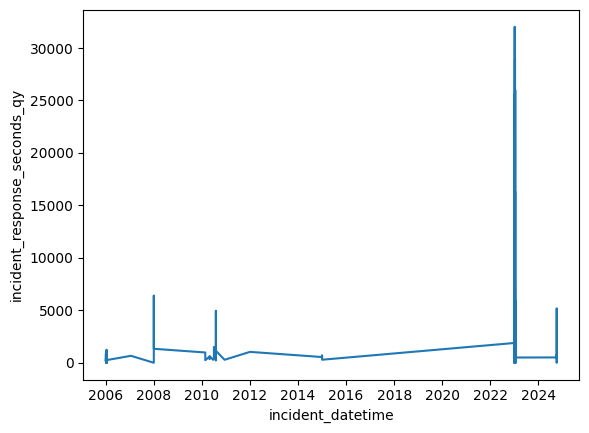

In [40]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

(0.0, 1000.0)

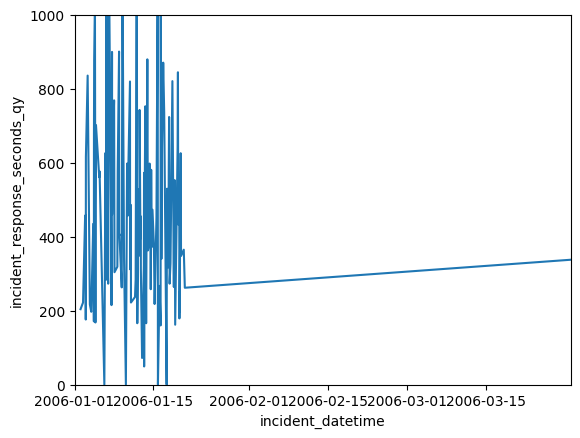

In [41]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-03-30"))
plt.ylim(0,1000)

# I initially wanted to look at the fluctuation in 2006

In [42]:
(time_df['incident_response_seconds_qy']==0 ).sum()

np.int64(426)

## Response time values equal to 0 are not meaningful in practice, so they were considered missing and replaced with NaN during EDA.

In [43]:
time_df['incident_response_seconds_qy'] = time_df['incident_response_seconds_qy'].replace(0,np.nan)

In [44]:
time_df.isna().sum()

incident_datetime                  0
incident_response_seconds_qy    3068
dtype: int64

(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

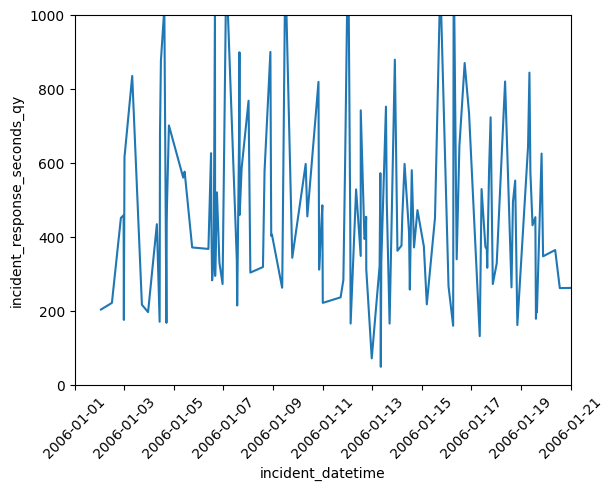

In [45]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1000)
plt.xticks(rotation=45)

In [46]:
time_df['incident_travel_tm_seconds_qy'] = main_df['incident_travel_tm_seconds_qy'].copy()

In [47]:
time_df


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy
0,2023-01-01 00:00:02,1887.0,477.0
1,2023-01-01 00:00:16,7365.0,7299.0
2,2023-01-01 00:00:30,479.0,365.0
3,2023-01-01 00:01:35,3725.0,0.0
4,2023-01-01 00:01:55,2108.0,801.0
...,...,...,...
59995,2023-01-14 18:13:18,285.0,267.0
59996,2023-01-14 18:13:31,537.0,516.0
59997,2023-01-14 18:13:54,636.0,558.0
59998,2023-01-14 18:13:59,158.0,145.0


In [48]:
(time_df['incident_travel_tm_seconds_qy']==0).sum()

np.int64(525)

In [49]:
time_df['incident_travel_tm_seconds_qy'] = time_df['incident_travel_tm_seconds_qy'].replace(0,np.nan)

<Axes: xlabel='incident_datetime', ylabel='incident_travel_tm_seconds_qy'>

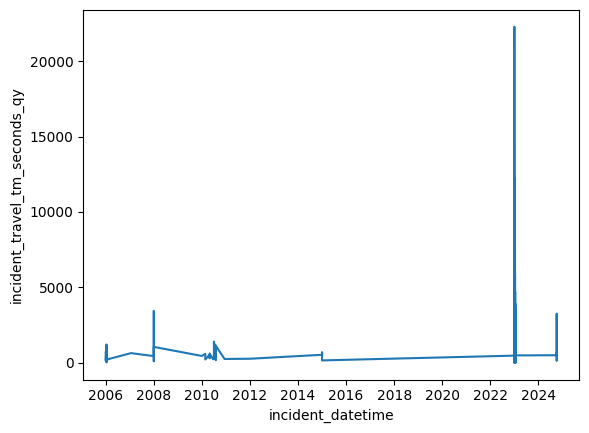

In [50]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_travel_tm_seconds_qy')

(0.0, 1500.0)

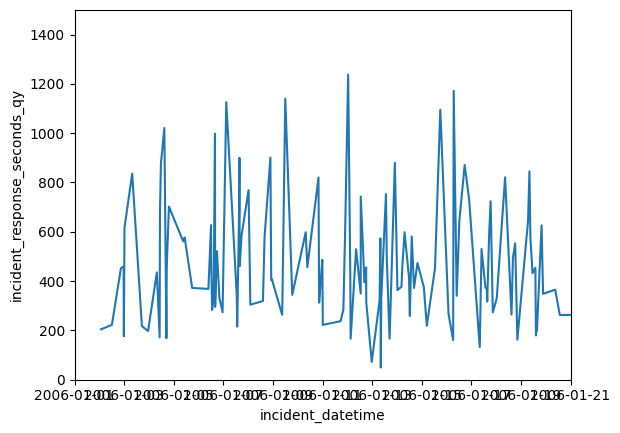

In [51]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)


(0.0, 1500.0)

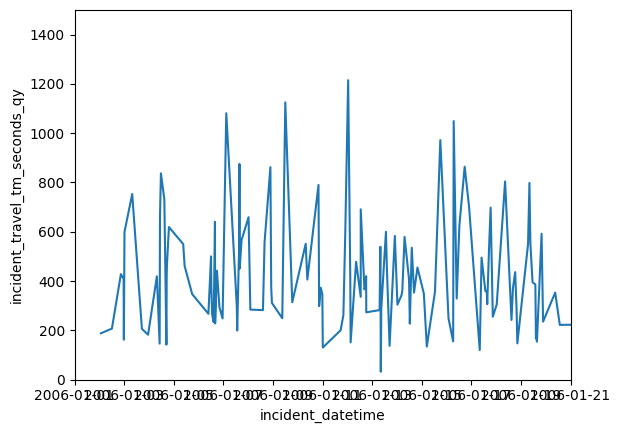

In [52]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_travel_tm_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)

## NYC emergency response times in early January 2006 show sustained high variability with frequent extreme delays, indicating systemic stress rather than isolated incidents or random noise.This assumption will be tested using other available features in the dataset.

In [53]:
time_df['dispatch_response_seconds_qy'] = main_df['dispatch_response_seconds_qy'].copy()

In [54]:
time_df

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy
0,2023-01-01 00:00:02,1887.0,477.0,1410
1,2023-01-01 00:00:16,7365.0,7299.0,66
2,2023-01-01 00:00:30,479.0,365.0,114
3,2023-01-01 00:01:35,3725.0,NaN,3725
4,2023-01-01 00:01:55,2108.0,801.0,1307
...,...,...,...,...
59995,2023-01-14 18:13:18,285.0,267.0,18
59996,2023-01-14 18:13:31,537.0,516.0,21
59997,2023-01-14 18:13:54,636.0,558.0,78
59998,2023-01-14 18:13:59,158.0,145.0,13


<Axes: xlabel='incident_datetime', ylabel='dispatch_response_seconds_qy'>

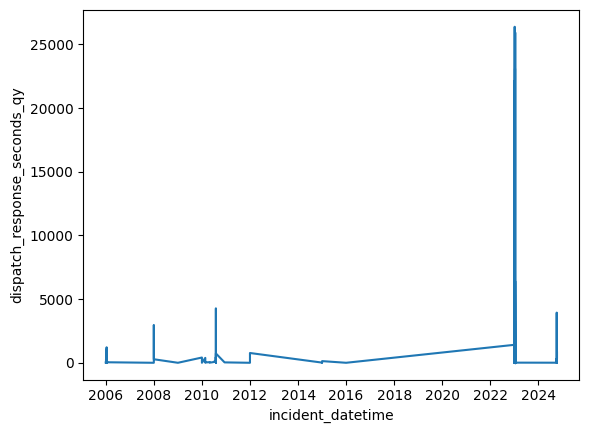

In [55]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')

In [56]:
time_df.corr()

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy
incident_datetime,1.000000,0.009481,0.013546,0.006427
incident_response_seconds_qy,0.009481,1.000000,0.560433,0.895075
incident_travel_tm_seconds_qy,0.013546,0.560433,1.000000,0.126152
dispatch_response_seconds_qy,0.006427,0.895075,0.126152,1.000000


(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

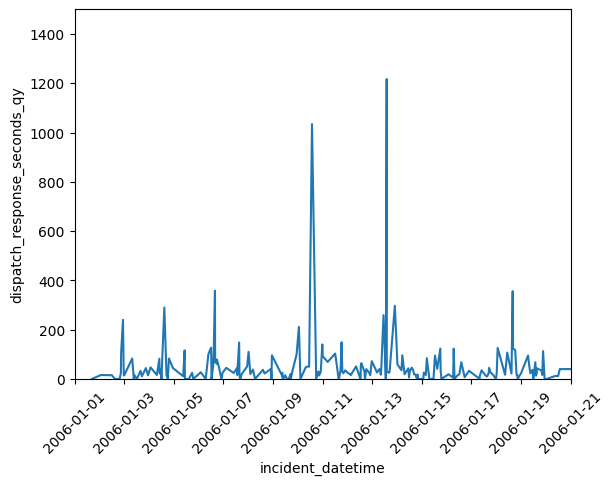

In [57]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)
plt.xticks(rotation=45)

In [58]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     3068
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy        0
dtype: int64

In [59]:
(time_df['dispatch_response_seconds_qy']==0).sum()

np.int64(1208)

In [60]:
time_df['dispatch_response_seconds_qy']=time_df['dispatch_response_seconds_qy'].replace(0,np.nan)


(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

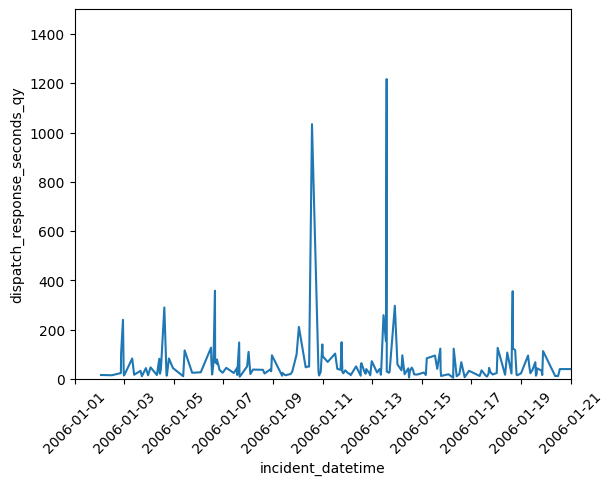

In [61]:
sns.lineplot(data=time_df,x='incident_datetime',y='dispatch_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.ylim(0,1500)
plt.xticks(rotation=45)

In [62]:
time_df['special_event_indicator']=main_df['special_event_indicator'].copy()

In [63]:
time_df['special_event_indicator'].value_counts()

special_event_indicator
N    59999
Y        1
Name: count, dtype: int64

In [64]:
time_df.loc[time_df['special_event_indicator']=='Y']

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator
2013,2010-01-01 00:00:21,NaN,455.0,NaN,Y


In [65]:
time_df['held_indicator']=main_df['held_indicator'].copy()

In [66]:
time_df['held_indicator'].value_counts()

held_indicator
N    53364
Y     6636
Name: count, dtype: int64

(array([13149., 13151., 13153., 13155., 13157., 13159., 13161., 13163.,
        13165., 13167., 13169.]),
 [Text(13149.0, 0, '2006-01-01'),
  Text(13151.0, 0, '2006-01-03'),
  Text(13153.0, 0, '2006-01-05'),
  Text(13155.0, 0, '2006-01-07'),
  Text(13157.0, 0, '2006-01-09'),
  Text(13159.0, 0, '2006-01-11'),
  Text(13161.0, 0, '2006-01-13'),
  Text(13163.0, 0, '2006-01-15'),
  Text(13165.0, 0, '2006-01-17'),
  Text(13167.0, 0, '2006-01-19'),
  Text(13169.0, 0, '2006-01-21')])

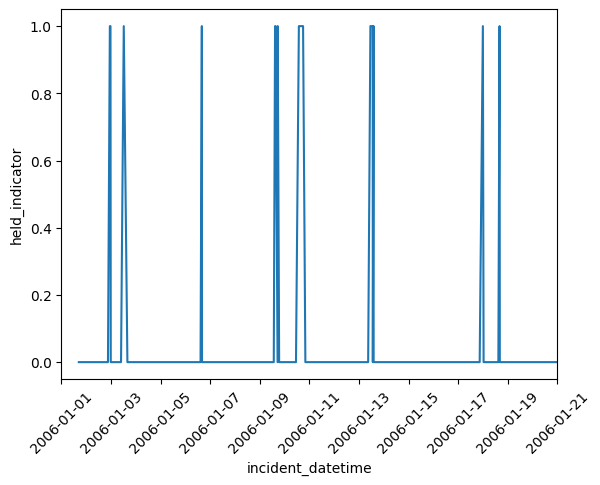

In [67]:
sns.lineplot(data=time_df,x='incident_datetime',y=(time_df['held_indicator'] == 'Y').astype(int))
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2006-01-21"))
plt.xticks(rotation=45)

## Taken together, the sustained volatility in response times, intermittent spikes in dispatch delays, and the temporal clustering of held calls suggest that early January 2006 was characterized by systemic operational stress in NYC emergency services rather than random noise or isolated incidents.

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

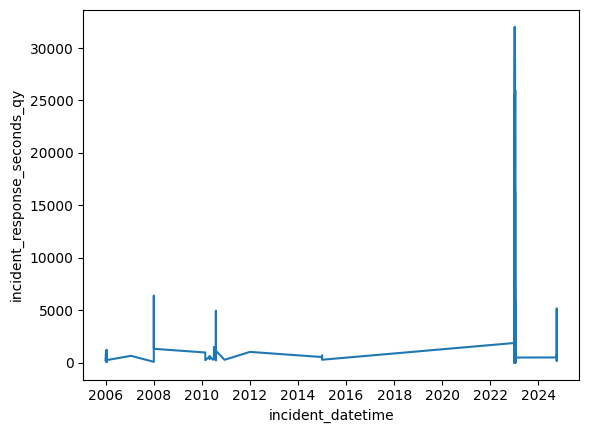

In [68]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

In [69]:
(time_df['incident_response_seconds_qy']==0).sum()

np.int64(0)

(15.0, 6900.0)

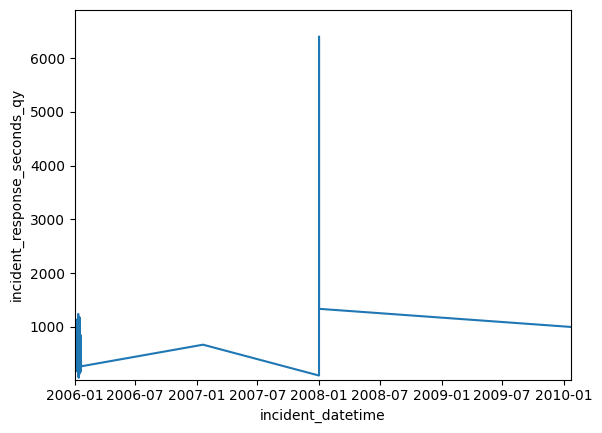

In [70]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2006-01-01"),pd.to_datetime("2010-01-21"))
plt.ylim(15,6900)

In [71]:
main_df.groupby('incident_datetime')['incident_response_seconds_qy'].mean()

incident_datetime
2006-01-01T16:49:57.000      NaN
2006-01-02T01:34:07.000    204.0
2006-01-02T12:09:26.000    222.0
2006-01-02T15:07:11.000      NaN
2006-01-02T19:36:53.000      NaN
                           ...  
2024-10-06T05:35:33.000    519.0
2024-10-06T05:35:57.000      NaN
2024-10-06T05:36:04.000    337.0
2024-10-06T05:56:56.000    721.0
2024-10-06T05:57:50.000      NaN
Name: incident_response_seconds_qy, Length: 58615, dtype: float64

In [72]:
time_df['incident_datetime']

0       2023-01-01 00:00:02
1       2023-01-01 00:00:16
2       2023-01-01 00:00:30
3       2023-01-01 00:01:35
4       2023-01-01 00:01:55
                ...        
59995   2023-01-14 18:13:18
59996   2023-01-14 18:13:31
59997   2023-01-14 18:13:54
59998   2023-01-14 18:13:59
59999   2023-01-14 18:14:35
Name: incident_datetime, Length: 60000, dtype: datetime64[ns]

In [73]:
time_df.set_index('incident_datetime') .resample('D')['incident_response_seconds_qy'].mean()

incident_datetime
2006-01-01           NaN
2006-01-02    302.600000
2006-01-03    466.500000
2006-01-04    552.888889
2006-01-05    503.333333
                 ...    
2024-10-02           NaN
2024-10-03           NaN
2024-10-04           NaN
2024-10-05    996.653061
2024-10-06    739.785714
Freq: D, Name: incident_response_seconds_qy, Length: 6854, dtype: float64

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_80422/1319922450.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('H')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

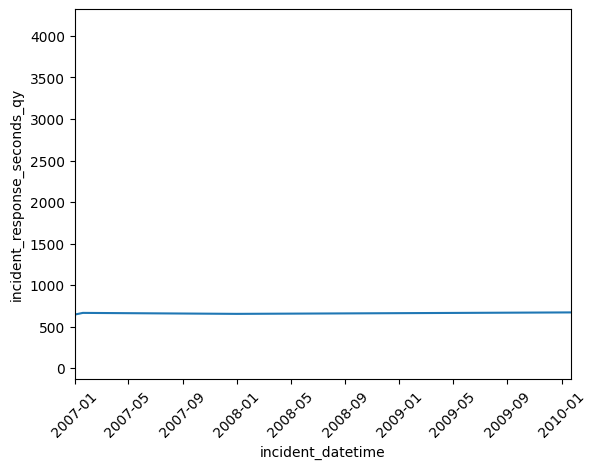

In [74]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('H')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

## The goal was to analyze the yearly distribution of incident_response_seconds_qy to check for outliers and identify extreme values.

(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

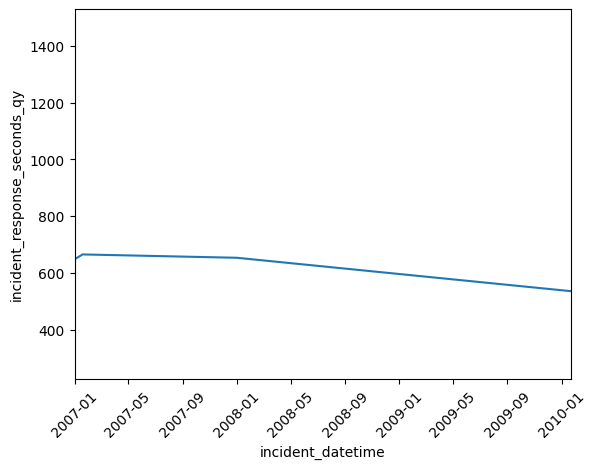

In [75]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('D')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_80422/3437593380.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('M')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

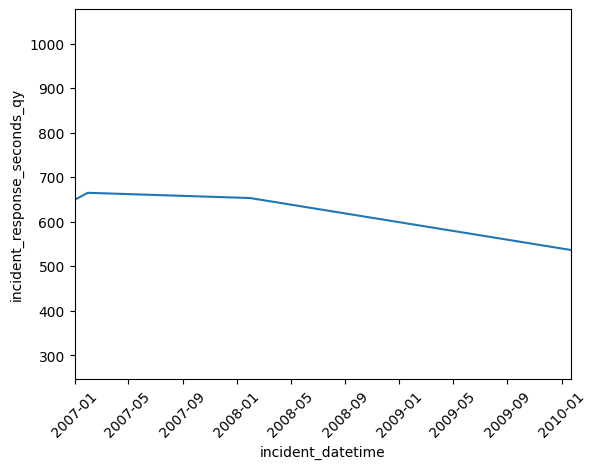

In [76]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('M')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_80422/4010724188.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.lineplot(time_df.set_index('incident_datetime') .resample('Y')['incident_response_seconds_qy'].mean())


(array([13514., 13634., 13757., 13879., 14000., 14123., 14245., 14365.,
        14488., 14610.]),
 [Text(13514.0, 0, '2007-01'),
  Text(13634.0, 0, '2007-05'),
  Text(13757.0, 0, '2007-09'),
  Text(13879.0, 0, '2008-01'),
  Text(14000.0, 0, '2008-05'),
  Text(14123.0, 0, '2008-09'),
  Text(14245.0, 0, '2009-01'),
  Text(14365.0, 0, '2009-05'),
  Text(14488.0, 0, '2009-09'),
  Text(14610.0, 0, '2010-01')])

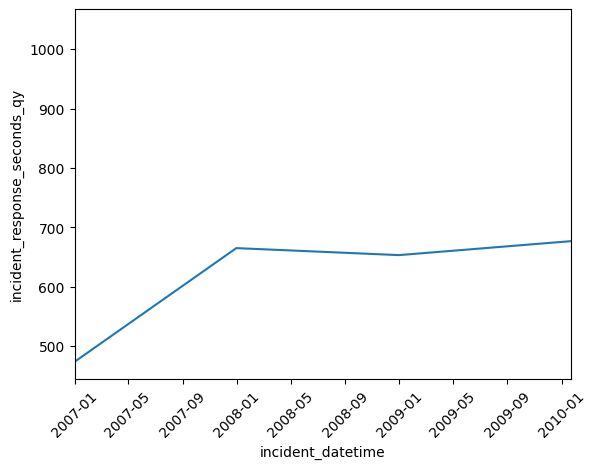

In [77]:
sns.lineplot(time_df.set_index('incident_datetime') .resample('Y')['incident_response_seconds_qy'].mean())
plt.xlim(pd.to_datetime("2007-01-01"),pd.to_datetime("2010-01-21"))
plt.xticks(rotation=45)

## When I look at the data hourly, daily, monthly, and yearly, the high point in 2008 disappears. This suggests that it may be an outlier, and I will check.

(np.float64(13848.0), np.float64(14029.0))

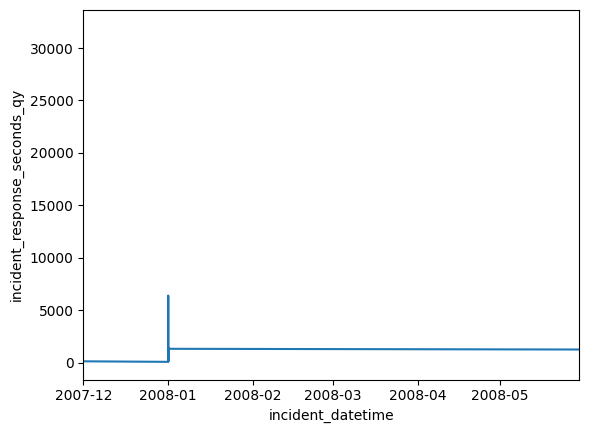

In [78]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-01"),pd.to_datetime("2008-05-30"))


(array([13877. , 13877.5, 13878. , 13878.5, 13879. , 13879.5, 13880. ,
        13880.5, 13881. ]),
 [Text(13877.0, 0, '12-30 00'),
  Text(13877.5, 0, '12-30 12'),
  Text(13878.0, 0, '12-31 00'),
  Text(13878.5, 0, '12-31 12'),
  Text(13879.0, 0, '01-01 00'),
  Text(13879.5, 0, '01-01 12'),
  Text(13880.0, 0, '01-02 00'),
  Text(13880.5, 0, '01-02 12'),
  Text(13881.0, 0, '01-03 00')])

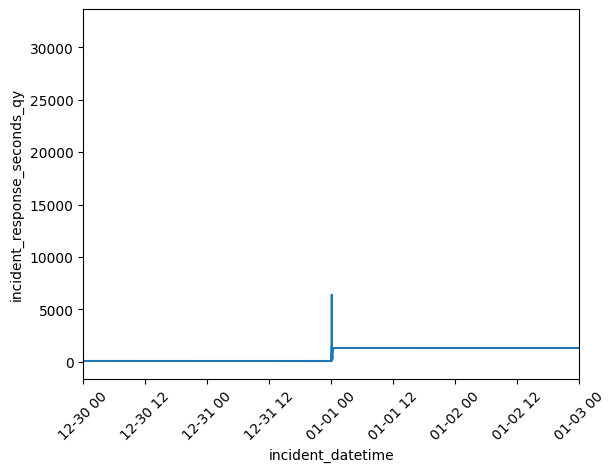

In [79]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-30"),pd.to_datetime("2008-01-03"))
plt.xticks(rotation=45)


(1.0, 8500.0)

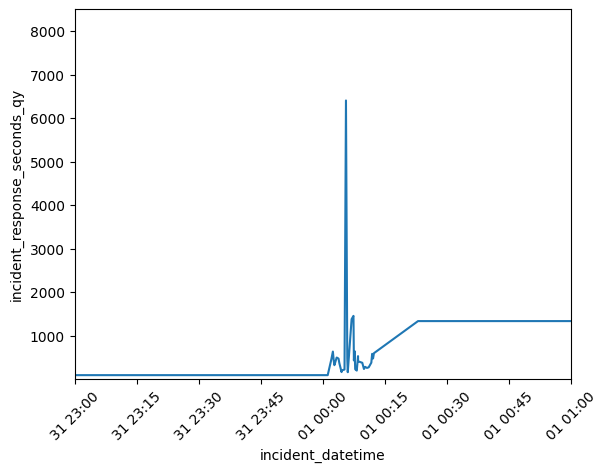

In [80]:
plt.Figure(figsize=(16,3))
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2007-12-31 23"),pd.to_datetime("2008-01-01 01"))
plt.xticks(rotation=45)
plt.ylim(1,8500)


In [81]:
raw_2006 = time_df[(time_df['incident_datetime'].dt.year == 2006)].copy()

In [82]:
raw_2006.sort_values('incident_response_seconds_qy',ascending=False).head(5)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
34067,2006-01-12 00:47:29,1238.0,1215.0,23.0,N,N
46517,2006-01-16 06:55:40,1172.0,1049.0,123.0,N,N
25961,2006-01-09 11:56:15,1140.0,1125.0,15.0,N,N
19352,2006-01-07 02:50:00,1126.0,1081.0,45.0,N,N
45227,2006-01-15 17:58:11,1095.0,972.0,123.0,N,N


In [83]:
raw_2008 = time_df[
    (time_df['incident_datetime'].dt.year == 2008)
].copy()

In [84]:
raw_2008.sort_values('incident_response_seconds_qy',ascending=False).head(30)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
21092,2008-01-01 00:05:40,6406.0,3438.0,2968.0,N,Y
29058,2008-01-01 00:07:29,1453.0,628.0,825.0,N,Y
28277,2008-01-01 00:07:02,1378.0,478.0,900.0,N,Y
20134,2008-01-01 00:23:06,1333.0,1056.0,277.0,N,N
30419,2008-01-01 00:07:46,641.0,565.0,76.0,N,N
7400,2008-01-01 00:02:30,632.0,601.0,31.0,N,N
58361,2008-01-01 00:12:26,595.0,535.0,60.0,N,N
55638,2008-01-01 00:12:00,580.0,525.0,55.0,N,N
36823,2008-01-01 00:08:35,527.0,493.0,34.0,N,N
12574,2008-01-01 00:03:25,495.0,363.0,132.0,N,N


## 2008 has a outlier
## These points are outliers in size, but they represent real delays, not data errors, so i didn’t remove them.

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

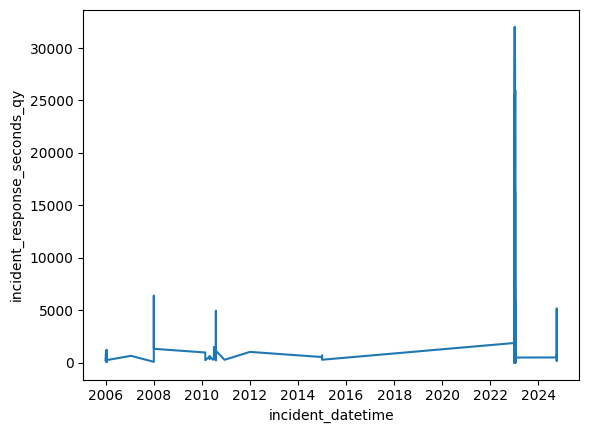

In [85]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

(array([14245., 14335., 14426., 14518., 14610., 14700., 14791., 14883.,
        14975.]),
 [Text(14245.0, 0, '2009-01'),
  Text(14335.0, 0, '2009-04'),
  Text(14426.0, 0, '2009-07'),
  Text(14518.0, 0, '2009-10'),
  Text(14610.0, 0, '2010-01'),
  Text(14700.0, 0, '2010-04'),
  Text(14791.0, 0, '2010-07'),
  Text(14883.0, 0, '2010-10'),
  Text(14975.0, 0, '2011-01')])

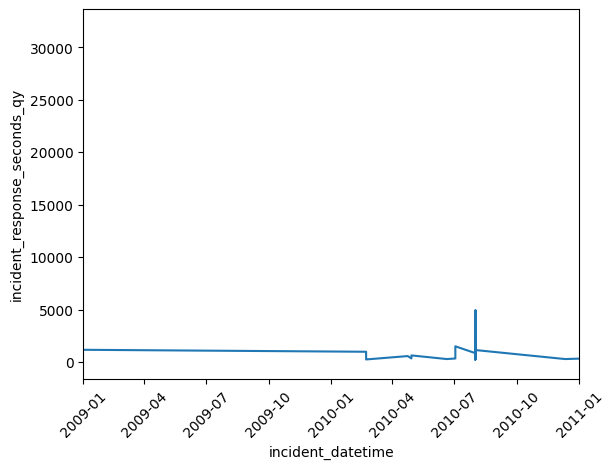

In [86]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2009"),pd.to_datetime("2011"))
plt.xticks(rotation=45)

(array([14700., 14730., 14761., 14791., 14822., 14853., 14883., 14914.,
        14944.]),
 [Text(14700.0, 0, '2010-04'),
  Text(14730.0, 0, '2010-05'),
  Text(14761.0, 0, '2010-06'),
  Text(14791.0, 0, '2010-07'),
  Text(14822.0, 0, '2010-08'),
  Text(14853.0, 0, '2010-09'),
  Text(14883.0, 0, '2010-10'),
  Text(14914.0, 0, '2010-11'),
  Text(14944.0, 0, '2010-12')])

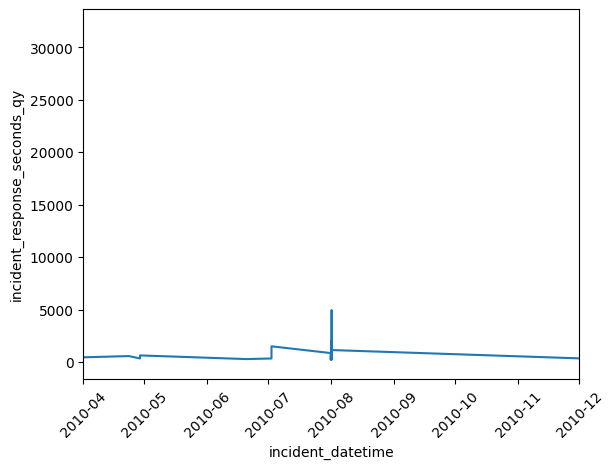

In [87]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2010-04"),pd.to_datetime("2010-12"))
plt.xticks(rotation=45)



In [88]:
raw_2010 = time_df[(time_df['incident_datetime'].dt.year == 2010)
].copy()

In [89]:
raw_2010.sort_values('incident_response_seconds_qy',ascending=False).head(60)

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
52033,2010-08-01 04:02:14,4958.0,684.0,4274.0,N,Y
38658,2010-08-01 01:19:09,2011.0,1153.0,858.0,N,Y
17511,2010-07-02 13:59:59,1500.0,1407.0,93.0,N,N
58735,2010-08-01 04:02:52,1144.0,1128.0,16.0,N,N
41788,2010-08-01 02:10:48,989.0,952.0,37.0,N,N
3858,2010-02-21 05:58:02,982.0,596.0,386.0,N,Y
31342,2010-07-31 22:59:46,962.0,514.0,448.0,N,Y
17752,2010-07-31 16:09:10,858.0,807.0,51.0,N,N
31956,2010-08-01 00:44:38,700.0,635.0,65.0,N,N
25111,2010-07-31 21:18:55,672.0,651.0,21.0,N,N


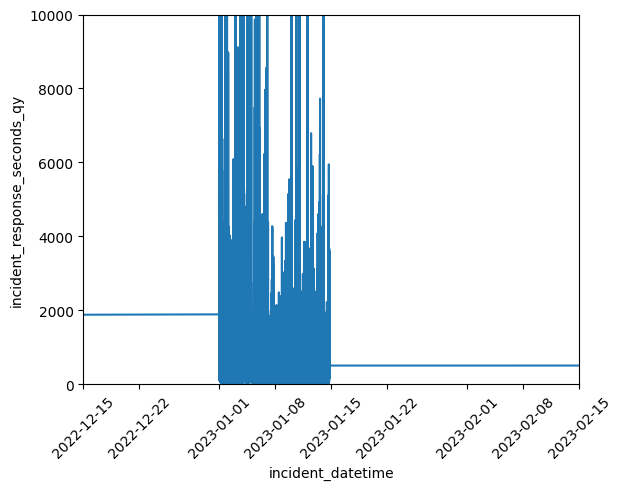

In [90]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')
plt.xlim(pd.to_datetime("2022-12-15"),pd.to_datetime("2023-02-15"))
plt.ylim(0, 10000)   
plt.xticks(rotation=45)
plt.show()


In [91]:
raw_2023 = time_df[
    (time_df['incident_datetime'].dt.year == 2023)
].copy()

In [92]:
raw_2023.sort_values('incident_response_seconds_qy',ascending=False).head(30)


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
23382,2023-01-06 00:00:06,32022.0,5642.0,26380.0,N,Y
44337,2023-01-11 00:00:10,29011.0,5916.0,23095.0,N,N
57208,2023-01-14 00:00:22,25995.0,66.0,25929.0,N,N
9347,2023-01-03 00:24:29,25554.0,3417.0,22137.0,N,N
23383,2023-01-06 00:00:09,24039.0,632.0,23407.0,N,N
44343,2023-01-11 00:01:32,23449.0,1083.0,22366.0,N,N
18836,2023-01-05 00:00:13,22899.0,1578.0,21321.0,N,N
18834,2023-01-05 00:00:07,22694.0,1336.0,21358.0,N,N
14018,2023-01-04 00:00:52,22369.0,697.0,21672.0,N,N
532,2023-01-01 01:59:06,22367.0,22272.0,95.0,N,Y


In [93]:
time_df[(time_df['incident_datetime'] >= "2023-01-01 00:00") &(time_df['incident_datetime'] <= "2023-01-01 06:00")]


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
0,2023-01-01 00:00:02,1887.0,477.0,1410.0,N,N
1,2023-01-01 00:00:16,7365.0,7299.0,66.0,N,Y
2,2023-01-01 00:00:30,479.0,365.0,114.0,N,N
3,2023-01-01 00:01:35,3725.0,NaN,3725.0,N,N
4,2023-01-01 00:01:55,2108.0,801.0,1307.0,N,Y
...,...,...,...,...,...,...
1232,2023-01-01 05:58:44,3098.0,982.0,2116.0,N,Y
1233,2023-01-01 05:58:49,1022.0,891.0,131.0,N,Y
1234,2023-01-01 05:59:47,NaN,NaN,NaN,N,N
1235,2023-01-01 05:59:54,NaN,NaN,NaN,N,N


In [94]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     3068
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy     1208
special_event_indicator             0
held_indicator                      0
dtype: int64

In [95]:
time_df.columns

Index(['incident_datetime', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'dispatch_response_seconds_qy',
       'special_event_indicator', 'held_indicator'],
      dtype='object')

In [96]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     3068
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy     1208
special_event_indicator             0
held_indicator                      0
dtype: int64

In [97]:
time_df['incident_datetime'].sort_values(ascending=False)

58288   2024-10-06 05:57:50
58184   2024-10-06 05:56:56
57313   2024-10-06 05:36:04
54278   2024-10-06 05:35:57
54069   2024-10-06 05:35:33
                ...        
6077    2006-01-02 19:36:53
5431    2006-01-02 15:07:11
5022    2006-01-02 12:09:26
3997    2006-01-02 01:34:07
2797    2006-01-01 16:49:57
Name: incident_datetime, Length: 60000, dtype: datetime64[ns]

In [98]:
time_df.columns

Index(['incident_datetime', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'dispatch_response_seconds_qy',
       'special_event_indicator', 'held_indicator'],
      dtype='object')

In [99]:
time_df['incident_datetime'].dt.year.value_counts()

incident_datetime
2023    59601
2006      215
2024       76
2010       50
2008       41
2012        8
2015        6
2009        1
2016        1
2007        1
Name: count, dtype: int64

In [100]:
time_df['incident_datetime'].value_counts()

incident_datetime
2023-01-11 16:01:11    3
2023-01-13 15:51:18    3
2023-01-13 12:40:40    3
2023-01-13 10:16:09    3
2023-01-04 17:42:00    3
                      ..
2023-01-05 10:15:32    1
2023-01-05 10:15:42    1
2023-01-05 10:15:50    1
2024-10-05 16:09:07    1
2023-01-14 18:14:35    1
Name: count, Length: 58615, dtype: int64

In [101]:
time_df.groupby(time_df["incident_datetime"].dt.year).apply(lambda x: x.isna().sum())

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
incident_datetime,,,,,,
2006,0,90,91,42,0,0
2007,0,0,0,0,0,0
2008,0,9,10,5,0,0
2009,0,1,1,1,0,0
2010,0,13,12,7,0,0
2012,0,7,7,7,0,0
2015,0,1,1,0,0,0
2016,0,1,1,1,0,0
2023,0,2933,3027,1140,0,0


In [102]:
na2006 =time_df[time_df['incident_datetime'].dt.year==2006]

In [103]:
na2006['incident_response_seconds_qy'].median()

np.float64(412.0)

In [104]:
na2006['inc'] = na2006['incident_response_seconds_qy'].fillna(na2006['incident_response_seconds_qy'].median())

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_80422/848369191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na2006['inc'] = na2006['incident_response_seconds_qy'].fillna(na2006['incident_response_seconds_qy'].median())


In [105]:
na2006.sort_values('incident_response_seconds_qy',ascending=False).head(5)

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator,inc
34067,2006-01-12 00:47:29,1238.0,1215.0,23.0,N,N,1238.0
46517,2006-01-16 06:55:40,1172.0,1049.0,123.0,N,N,1172.0
25961,2006-01-09 11:56:15,1140.0,1125.0,15.0,N,N,1140.0
19352,2006-01-07 02:50:00,1126.0,1081.0,45.0,N,N,1126.0
45227,2006-01-15 17:58:11,1095.0,972.0,123.0,N,N,1095.0


In [106]:
na2006['inc'].isna().sum()

np.int64(0)

In [107]:
na2006['inc']

2797     412.0
3997     204.0
5022     222.0
5431     412.0
6077     412.0
         ...  
57815    412.0
58020    412.0
58667    365.0
59177    412.0
59483    262.0
Name: inc, Length: 215, dtype: float64

In [108]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     3068
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy     1208
special_event_indicator             0
held_indicator                      0
dtype: int64

In [109]:
time_df.loc[time_df['incident_datetime'].dt.year == 2006,'incident_response_seconds_qy'] = na2006['inc'].values

In [110]:
time_df[time_df['incident_datetime'].dt.year==2006].isna().sum()

incident_datetime                 0
incident_response_seconds_qy      0
incident_travel_tm_seconds_qy    91
dispatch_response_seconds_qy     42
special_event_indicator           0
held_indicator                    0
dtype: int64

In [111]:
na2006['incident_travel_tm'] = na2006['incident_travel_tm_seconds_qy'].fillna(na2006['incident_travel_tm_seconds_qy'].median())


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_80422/121650811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na2006['incident_travel_tm'] = na2006['incident_travel_tm_seconds_qy'].fillna(na2006['incident_travel_tm_seconds_qy'].median())


In [112]:
time_df[time_df['incident_datetime'].dt.year==2006].describe()

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy
count,215,215.000000,124.000000,173.000000
mean,2006-01-11 10:54:46.423255808,447.409302,427.459677,66.219653
min,2006-01-01 16:49:57,49.000000,32.000000,5.000000
25%,2006-01-06 20:00:36,373.000000,259.500000,19.000000
50%,2006-01-11 18:26:05,412.000000,371.500000,34.000000
75%,2006-01-15 13:54:28.500000,455.500000,551.500000,68.000000
max,2006-01-20 13:36:01,1238.000000,1215.000000,1217.000000
std,NaN,193.770531,232.173764,129.896686


In [113]:
time_df.columns

Index(['incident_datetime', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'dispatch_response_seconds_qy',
       'special_event_indicator', 'held_indicator'],
      dtype='object')

In [114]:
time_df['incident_response_seconds_qy'] = (time_df.groupby(time_df['incident_datetime'].dt.year)['incident_response_seconds_qy'].transform(lambda x: x.fillna(x.median())))

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/numpy/lib/_nanfunctions_impl.py:1213: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


##NaN values were filled with the median of their own year.

In [115]:
time_df['incident_response_seconds_qy'].isna().sum()

np.int64(2)

In [116]:
time_df.loc[time_df['incident_response_seconds_qy'].isna(), 'incident_datetime'].dt.year


2253    2009
4440    2016
Name: incident_datetime, dtype: int32

In [117]:
overal_median = time_df['incident_response_seconds_qy'].median()
time_df['incident_response_seconds_qy'] = time_df['incident_response_seconds_qy'].fillna(overal_median)

## A small number of missing response time values (n=2) were observed in years with insufficient data. These values were imputed using the overall median response time to preserve robustness against outliers.

In [118]:
time_df['incident_response_seconds_qy'].isna().sum()

np.int64(0)

In [119]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy        0
incident_travel_tm_seconds_qy    3163
dispatch_response_seconds_qy     1208
special_event_indicator             0
held_indicator                      0
dtype: int64

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

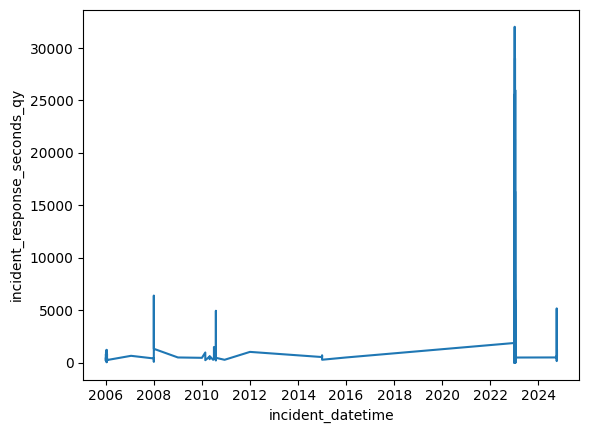

In [120]:
sns.lineplot(data=time_df,x='incident_datetime',y='incident_response_seconds_qy')

<Axes: xlabel='incident_response_seconds_qy', ylabel='Count'>

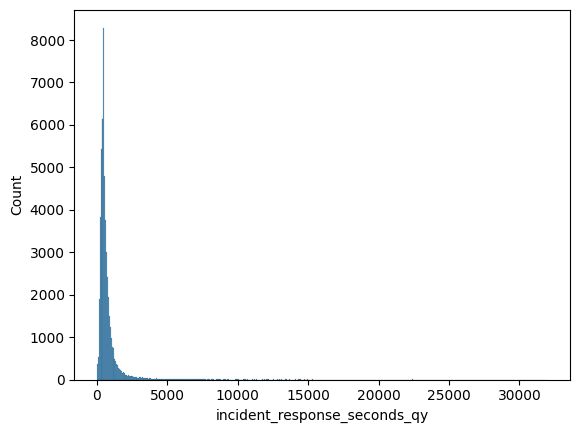

In [121]:
sns.histplot(time_df['incident_response_seconds_qy'])   

In [122]:
time_df['incident_travel_tm_seconds_qy'].isna().sum()

np.int64(3163)

In [123]:
time_df.groupby(time_df["incident_datetime"].dt.year).apply(lambda x: x.isna().sum())

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
incident_datetime,,,,,,
2006,0,0,91,42,0,0
2007,0,0,0,0,0,0
2008,0,0,10,5,0,0
2009,0,0,1,1,0,0
2010,0,0,12,7,0,0
2012,0,0,7,7,0,0
2015,0,0,1,0,0,0
2016,0,0,1,1,0,0
2023,0,0,3027,1140,0,0


In [124]:
time_df.groupby(time_df["incident_datetime"].dt.year)['incident_travel_tm_seconds_qy'].apply(lambda x: x.isna().sum())

incident_datetime
2006      91
2007       0
2008      10
2009       1
2010      12
2012       7
2015       1
2016       1
2023    3027
2024      13
Name: incident_travel_tm_seconds_qy, dtype: int64

In [125]:
time_df.loc[time_df['incident_datetime'].dt.year == 2006,'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
False    124
True      91
Name: count, dtype: int64

In [126]:
time_df.loc[time_df['incident_datetime'].dt.year == 2007,'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
False    1
Name: count, dtype: int64

In [127]:
time_df.loc[time_df['incident_datetime'].dt.year == 2008,'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
False    31
True     10
Name: count, dtype: int64

In [128]:
time_df.loc[time_df['incident_datetime'].dt.year == 2009,'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
True    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Records per Year')

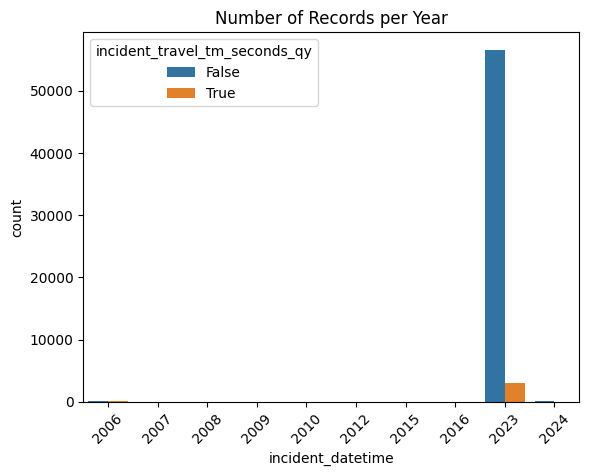

In [129]:
sns.countplot(x=time_df['incident_datetime'].dt.year,hue=time_df['incident_travel_tm_seconds_qy'].isna())
plt.xticks(rotation=45)
plt.title("Number of Records per Year")

In [130]:
time_df.loc[time_df['incident_datetime'].dt.year.between(2006,2022),'incident_travel_tm_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year.between(2006,2022),'incident_travel_tm_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year.between(2006, 2022),'incident_travel_tm_seconds_qy'].median())

In [131]:
time_df.loc[time_df['incident_datetime'].dt.year.between(2006, 2022),'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
False    323
Name: count, dtype: int64

##Missing values in incident_travel_tm_seconds_qy between 2006–2022 were filled using the overall median of that period.

In [132]:
time_df.loc[time_df['incident_datetime'].dt.year==2023,'incident_travel_tm_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year==2023,'incident_travel_tm_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year==2023,'incident_travel_tm_seconds_qy'].median())

In [133]:
time_df['incident_travel_tm_seconds_qy'].isna().sum()

np.int64(13)

In [134]:
time_df[time_df['incident_travel_tm_seconds_qy'].isna()]


,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator
10152,2024-10-05 13:49:14,624.0,NaN,24.0,N,N
20363,2024-10-05 16:09:09,624.0,NaN,44.0,N,Y
21270,2024-10-05 16:30:12,624.0,NaN,NaN,N,Y
22596,2024-10-05 16:30:18,624.0,NaN,13.0,N,N
26113,2024-10-05 19:06:19,624.0,NaN,NaN,N,N
29840,2024-10-05 20:08:23,624.0,NaN,329.0,N,Y
30677,2024-10-05 20:09:17,624.0,NaN,NaN,N,Y
30712,2024-10-05 20:09:17,624.0,NaN,NaN,N,Y
34162,2024-10-05 21:25:12,624.0,NaN,616.0,N,N
45061,2024-10-05 23:24:18,624.0,NaN,354.0,N,Y


<Axes: xlabel='incident_datetime', ylabel='incident_travel_tm_seconds_qy'>

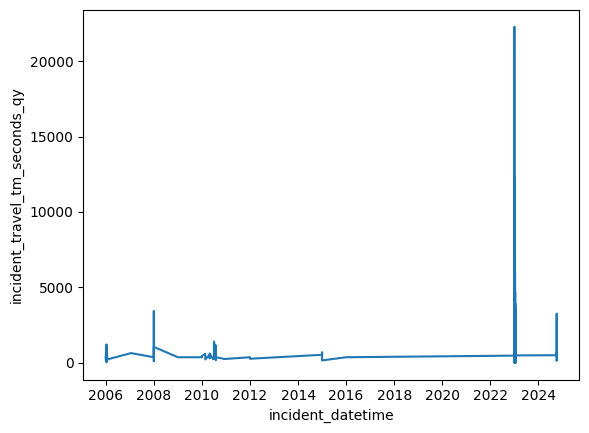

In [135]:

sns.lineplot(data=time_df,x='incident_datetime',y='incident_travel_tm_seconds_qy')

In [136]:
time_df.loc[time_df['incident_datetime'].dt.year == 2024,'incident_travel_tm_seconds_qy'].isna().value_counts()

incident_travel_tm_seconds_qy
False    63
True     13
Name: count, dtype: int64

In [137]:
## Due to limited data in 2024, missing values were filled using the 2023 median.

In [138]:
time_df.loc[time_df['incident_datetime'].dt.year==2024,'incident_travel_tm_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year==2024,'incident_travel_tm_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year==2023,'incident_travel_tm_seconds_qy'].median())

In [139]:
time_df['incident_travel_tm_seconds_qy'].isna().sum()

np.int64(0)

In [140]:
time_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy        0
incident_travel_tm_seconds_qy       0
dispatch_response_seconds_qy     1208
special_event_indicator             0
held_indicator                      0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2012'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2023'),
  Text(9, 0, '2024')])

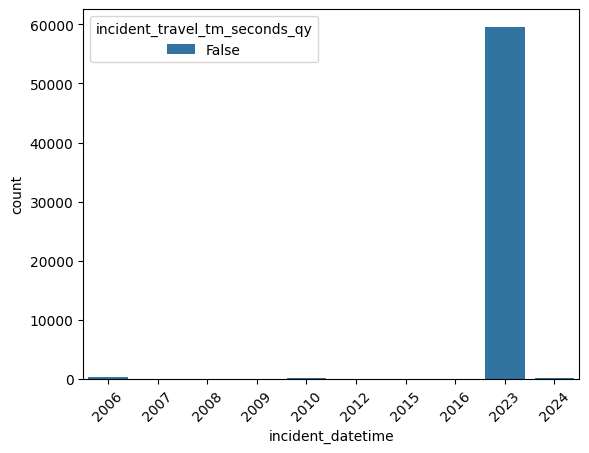

In [141]:
sns.countplot(
    data=time_df,
    x=time_df['incident_datetime'].dt.year,
    hue=time_df['incident_travel_tm_seconds_qy'].isna()
)

plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2012'),
  Text(6, 0, '2015'),
  Text(7, 0, '2016'),
  Text(8, 0, '2023'),
  Text(9, 0, '2024')])

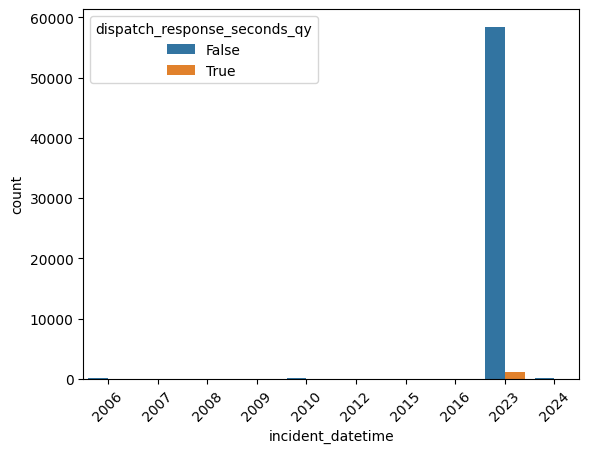

In [142]:
sns.countplot(data=time_df,x=time_df['incident_datetime'].dt.year,hue=time_df['dispatch_response_seconds_qy'].isna())
plt.xticks(rotation=45)

In [143]:
time_df.groupby(time_df['incident_datetime'].dt.year)['dispatch_response_seconds_qy'].apply(lambda x : x.isna().sum())

incident_datetime
2006      42
2007       0
2008       5
2009       1
2010       7
2012       7
2015       0
2016       1
2023    1140
2024       5
Name: dispatch_response_seconds_qy, dtype: int64

i will apply a common median for the years between 2006 and 2022, while imputing 2023 separately using its own year-specific median.

In [144]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   incident_datetime              60000 non-null  datetime64[ns]
 1   incident_response_seconds_qy   60000 non-null  float64       
 2   incident_travel_tm_seconds_qy  60000 non-null  float64       
 3   dispatch_response_seconds_qy   58792 non-null  float64       
 4   special_event_indicator        60000 non-null  object        
 5   held_indicator                 60000 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.7+ MB


In [145]:
time_df.loc[time_df['incident_datetime'].dt.year.between(2006,2022),'dispatch_response_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year.between(2006,2022),'dispatch_response_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year.between(2006, 2022),'dispatch_response_seconds_qy'].median())

In [146]:
time_df.loc[time_df['incident_datetime'].dt.year==2023,'dispatch_response_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year==2023,'dispatch_response_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year==2023,'dispatch_response_seconds_qy'].median())

In [147]:
time_df.loc[time_df['incident_datetime'].dt.year==2024,'dispatch_response_seconds_qy']=\
    time_df.loc[time_df['incident_datetime'].dt.year==2024,'dispatch_response_seconds_qy'].fillna \
    (time_df.loc[time_df['incident_datetime'].dt.year==2023,'dispatch_response_seconds_qy'].median())

In [148]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   incident_datetime              60000 non-null  datetime64[ns]
 1   incident_response_seconds_qy   60000 non-null  float64       
 2   incident_travel_tm_seconds_qy  60000 non-null  float64       
 3   dispatch_response_seconds_qy   60000 non-null  float64       
 4   special_event_indicator        60000 non-null  object        
 5   held_indicator                 60000 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.7+ MB


In [149]:
## feature engineering

In [150]:
time_df['year'] = time_df['incident_datetime'].dt.year
time_df['month'] = time_df['incident_datetime'].dt.month
time_df['day'] = time_df['incident_datetime'].dt.day
time_df['hour'] = time_df['incident_datetime'].dt.hour
time_df['dayofweek'] = time_df['incident_datetime'].dt.dayofweek


In [151]:
time_df.isna().sum()

incident_datetime                0
incident_response_seconds_qy     0
incident_travel_tm_seconds_qy    0
dispatch_response_seconds_qy     0
special_event_indicator          0
held_indicator                   0
year                             0
month                            0
day                              0
hour                             0
dayofweek                        0
dtype: int64

In [152]:
time_df['special_event_indicator'].isna().sum()

np.int64(0)

In [153]:
time_df['special_event_indicator']=pd.get_dummies(main_df['special_event_indicator'],drop_first=True,dtype=int)
time_df['held_indicator']=pd.get_dummies(main_df['held_indicator'],drop_first=True,dtype=int)

In [154]:
time_df.head()

,incident_datetime,incident_response_seconds_qy,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,special_event_indicator,held_indicator,year,month,day,hour,dayofweek
0,2023-01-01 00:00:02,1887.0,477.0,1410.0,0,0,2023,1,1,0,6
1,2023-01-01 00:00:16,7365.0,7299.0,66.0,0,1,2023,1,1,0,6
2,2023-01-01 00:00:30,479.0,365.0,114.0,0,0,2023,1,1,0,6
3,2023-01-01 00:01:35,3725.0,454.0,3725.0,0,0,2023,1,1,0,6
4,2023-01-01 00:01:55,2108.0,801.0,1307.0,0,1,2023,1,1,0,6


In [155]:
x = time_df[['incident_travel_tm_seconds_qy','incident_travel_tm_seconds_qy','dispatch_response_seconds_qy','year','month','hour','special_event_indicator','held_indicator','dayofweek',]]

y = time_df['incident_response_seconds_qy']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)



In [157]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9275910992530255
MAE: 19.919612585058303
RMSE: 256.5700186686521


probably data leakage

In [336]:
try1_df = main_df.copy()

In [337]:
try1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cad_incident_id                 60000 non-null  int64  
 1   incident_datetime               60000 non-null  object 
 2   initial_call_type               60000 non-null  object 
 3   initial_severity_level_code     60000 non-null  int64  
 4   final_call_type                 60000 non-null  object 
 5   final_severity_level_code       60000 non-null  int64  
 6   first_assignment_datetime       59223 non-null  object 
 7   valid_dispatch_rspns_time_indc  60000 non-null  object 
 8   dispatch_response_seconds_qy    60000 non-null  int64  
 9   first_activation_datetime       59126 non-null  object 
 10  first_on_scene_datetime         57362 non-null  object 
 11  valid_incident_rspns_time_indc  60000 non-null  object 
 12  incident_response_seconds_qy    

In [338]:
try1_df['incident_datetime'] = pd.to_datetime(try1_df['incident_datetime'])

In [339]:
try1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   cad_incident_id                 60000 non-null  int64         
 1   incident_datetime               60000 non-null  datetime64[ns]
 2   initial_call_type               60000 non-null  object        
 3   initial_severity_level_code     60000 non-null  int64         
 4   final_call_type                 60000 non-null  object        
 5   final_severity_level_code       60000 non-null  int64         
 6   first_assignment_datetime       59223 non-null  object        
 7   valid_dispatch_rspns_time_indc  60000 non-null  object        
 8   dispatch_response_seconds_qy    60000 non-null  int64         
 9   first_activation_datetime       59126 non-null  object        
 10  first_on_scene_datetime         57362 non-null  object        
 11  va

In [340]:
time_df.columns

Index(['incident_datetime', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'dispatch_response_seconds_qy',
       'special_event_indicator', 'held_indicator', 'year', 'month', 'day',
       'hour', 'dayofweek'],
      dtype='object')

In [341]:
try1_df['year'] = try1_df['incident_datetime'].dt.year
try1_df['month'] = try1_df['incident_datetime'].dt.month
try1_df['day'] = try1_df['incident_datetime'].dt.day
try1_df['hour'] = try1_df['incident_datetime'].dt.hour
try1_df['dayofweek'] = try1_df['incident_datetime'].dt.dayofweek


In [342]:
try1_df= try1_df[['incident_datetime', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'dispatch_response_seconds_qy',
       'special_event_indicator', 'held_indicator', 'year', 'month', 'day',
       'hour', 'dayofweek']]

In [343]:
try1_df.isna().sum()

incident_datetime                   0
incident_response_seconds_qy     2642
incident_travel_tm_seconds_qy    2638
dispatch_response_seconds_qy        0
special_event_indicator             0
held_indicator                      0
year                                0
month                               0
day                                 0
hour                                0
dayofweek                           0
dtype: int64

In [344]:
try1_df = try1_df.sort_values("incident_datetime")

train = try1_df[try1_df["incident_datetime"] < "2023-01-11"].copy()
test  = try1_df[try1_df["incident_datetime"] >= "2023-01-11"].copy()

In [345]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44354 entries, 2797 to 44336
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   incident_datetime              44354 non-null  datetime64[ns]
 1   incident_response_seconds_qy   42269 non-null  float64       
 2   incident_travel_tm_seconds_qy  42272 non-null  float64       
 3   dispatch_response_seconds_qy   44354 non-null  int64         
 4   special_event_indicator        44354 non-null  object        
 5   held_indicator                 44354 non-null  object        
 6   year                           44354 non-null  int32         
 7   month                          44354 non-null  int32         
 8   day                            44354 non-null  int32         
 9   hour                           44354 non-null  int32         
 10  dayofweek                      44354 non-null  int32         
dtypes: datetime64[ns]

In [346]:
train.drop(columns=['incident_datetime'], inplace=True)
test.drop(columns=['incident_datetime'], inplace=True)

In [347]:
train.isna().sum()   

incident_response_seconds_qy     2085
incident_travel_tm_seconds_qy    2082
dispatch_response_seconds_qy        0
special_event_indicator             0
held_indicator                      0
year                                0
month                               0
day                                 0
hour                                0
dayofweek                           0
dtype: int64

In [348]:
test.isna().sum()

incident_response_seconds_qy     557
incident_travel_tm_seconds_qy    556
dispatch_response_seconds_qy       0
special_event_indicator            0
held_indicator                     0
year                               0
month                              0
day                                0
hour                               0
dayofweek                          0
dtype: int64

In [349]:
train_median = train[['incident_response_seconds_qy','incident_travel_tm_seconds_qy']].median()

In [350]:
train[['incident_response_seconds_qy','incident_travel_tm_seconds_qy']]= train[['incident_response_seconds_qy','incident_travel_tm_seconds_qy']].fillna(train_median)
test[['incident_response_seconds_qy','incident_travel_tm_seconds_qy']]= test[['incident_response_seconds_qy','incident_travel_tm_seconds_qy']].fillna(train_median)


In [351]:
train.isna().sum()   

incident_response_seconds_qy     0
incident_travel_tm_seconds_qy    0
dispatch_response_seconds_qy     0
special_event_indicator          0
held_indicator                   0
year                             0
month                            0
day                              0
hour                             0
dayofweek                        0
dtype: int64

In [352]:
test.isna().sum()

incident_response_seconds_qy     0
incident_travel_tm_seconds_qy    0
dispatch_response_seconds_qy     0
special_event_indicator          0
held_indicator                   0
year                             0
month                            0
day                              0
hour                             0
dayofweek                        0
dtype: int64

In [353]:
train = pd.get_dummies(train, columns=['special_event_indicator'], drop_first=True)
test  = pd.get_dummies(test,  columns=['special_event_indicator'], drop_first=True)

test = test.reindex(columns=train.columns, fill_value=0)


In [354]:
train = pd.get_dummies(train, columns=['held_indicator'], drop_first=True)
test  = pd.get_dummies(test,  columns=['held_indicator'], drop_first=True)

test = test.reindex(columns=train.columns, fill_value=0)


In [355]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44354 entries, 2797 to 44336
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   incident_response_seconds_qy   44354 non-null  float64
 1   incident_travel_tm_seconds_qy  44354 non-null  float64
 2   dispatch_response_seconds_qy   44354 non-null  int64  
 3   year                           44354 non-null  int32  
 4   month                          44354 non-null  int32  
 5   day                            44354 non-null  int32  
 6   hour                           44354 non-null  int32  
 7   dayofweek                      44354 non-null  int32  
 8   special_event_indicator_Y      44354 non-null  bool   
 9   held_indicator_Y               44354 non-null  bool   
dtypes: bool(2), float64(2), int32(5), int64(1)
memory usage: 2.3 MB


In [356]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44354 entries, 2797 to 44336
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   incident_travel_tm_seconds_qy  44354 non-null  float64
 1   dispatch_response_seconds_qy   44354 non-null  int64  
 2   year                           44354 non-null  int32  
 3   month                          44354 non-null  int32  
 4   day                            44354 non-null  int32  
 5   hour                           44354 non-null  int32  
 6   dayofweek                      44354 non-null  int32  
 7   special_event_indicator_Y      44354 non-null  bool   
 8   held_indicator_Y               44354 non-null  bool   
dtypes: bool(2), float64(1), int32(5), int64(1)
memory usage: 1.9 MB


In [357]:
x_test

,incident_travel_tm_seconds_qy,dispatch_response_seconds_qy,year,month,day,hour,dayofweek,special_event_indicator_Y,held_indicator_Y
44337,5916.0,23095,2023,1,11,0,2,0,False
44338,457.0,0,2023,1,11,0,2,0,False
44339,538.0,16,2023,1,11,0,2,0,False
44340,190.0,17,2023,1,11,0,2,0,False
44341,223.0,10,2023,1,11,0,2,0,False
...,...,...,...,...,...,...,...,...,...
54069,219.0,300,2024,10,6,5,6,0,False
54278,457.0,9,2024,10,6,5,6,0,False
57313,293.0,44,2024,10,6,5,6,0,False
58184,658.0,63,2024,10,6,5,6,0,False


In [358]:
x_test.drop(columns=['incident_datetime'])

KeyError: "['incident_datetime'] not found in axis"

In [359]:
x_train = train.drop(columns=['incident_response_seconds_qy'])
y_train = train['incident_response_seconds_qy']
x_test = test.drop(columns=['incident_response_seconds_qy'])
y_test = test['incident_response_seconds_qy']

In [362]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
## These columns can not be included when training the model:
## ['incident_response_sec', 'travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type']

In [296]:
x_train.columns

Index(['incident_travel_tm_seconds_qy', 'incident_travel_tm_seconds_qy',
       'dispatch_response_seconds_qy', 'year', 'month', 'hour',
       'special_event_indicator', 'held_indicator', 'dayofweek'],
      dtype='object')

In [363]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9846468543658548
MAE: 9.20084325602113
RMSE: 78.68845164055855
